# **Predicting Nutrient Gaps**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Loading and previwing the Data**

In [21]:
!pip install catboost

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_validate, KFold
from sklearn.decomposition import PCA

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [23]:
train_df = pd.read_csv('/content/drive/MyDrive/soil fertility pred/train_df.csv')
test_df = pd.read_csv('/content/drive/MyDrive/soil fertility pred/test_df.csv')
train_gap_df = pd.read_csv('/content/drive/MyDrive/soil fertility pred/train_gap_df.csv')
test_gap_df = pd.read_csv('/content/drive/MyDrive/soil fertility pred/test_gap_df.csv')
sample_submission = pd.read_csv('/content/drive/MyDrive/soil fertility pred/SampleSubmission.csv')

In [ ]:
# Loading datasets
train_df = pd.read_csv('data/Train.csv')
test_df = pd.read_csv('data/Test.csv')
train_gap_df = pd.read_csv('data/Gap_Train.csv')
test_gap_df = pd.read_csv('data/Gap_Test.csv')
sample_submission = pd.read_csv('data/SampleSubmission.csv')
mod13 = pd.read_csv("data/MODIS_MOD13Q1_data.csv")
mod16 = pd.read_csv("data/MODIS_MOD16A2_data.csv")
# sentinel1 = pd.read_csv("data/Sentinel1_data.csv")
sentinel2 = pd.read_csv("data/Sentinel2_data.csv")

##### Previewing dataset


In [ ]:
train_df.head()

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,...,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B
0,site_id_bIEHwl,ID_I5RGjv,70.603761,46.173798,7.75,176,248,920,108,190,...,0.34,147,6830,2310,5.66,75.2,85.0,0.82,2.98,0.24
1,site_id_nGvnKc,ID_8jWzJ5,70.590479,46.078924,7.10,181,250,1080,113,191,...,11.70,151,1180,235,19.40,96.2,409.0,2.57,4.32,0.10
2,site_id_nGvnKc,ID_UgzkN8,70.582553,46.048820,6.95,188,250,1109,111,191,...,21.80,151,1890,344,11.00,76.7,65.0,1.95,1.24,0.22
3,site_id_nGvnKc,ID_DLLHM9,70.573267,46.021910,7.83,174,250,1149,112,191,...,39.90,201,6660,719,14.90,81.9,73.0,4.90,3.08,0.87
4,site_id_7SA9rO,ID_d009mj,70.585330,46.204336,8.07,188,250,869,114,191,...,1.00,90,7340,1160,8.66,69.4,149.0,0.55,3.03,0.31


In [ ]:
test_df.head()

,site,PID,lon,lat,pH,alb,bio1,bio12,bio15,bio7,...,para,parv,ph20,slope,snd20,soc20,tim,wp,xhp20,BulkDensity
0,site_id_hgJpkz,ID_NGS9Bx,69.170794,44.522885,6.86,144,256,910,108,186,...,37.940418,467.619293,6.825,1.056416,25.50,15.25,8.732471,0.016981,0.005831,1.20
1,site_id_olmuI5,ID_YdVKXw,68.885265,44.741057,7.08,129,260,851,110,187,...,35.961353,542.590149,6.725,0.730379,18.75,14.00,10.565657,0.021030,0.005134,1.24
2,site_id_PTZdJz,ID_MZAlfE,68.970210,44.675777,6.50,142,259,901,109,187,...,38.983898,416.385437,6.825,1.146542,21.00,14.00,9.590125,0.018507,0.004480,1.23
3,site_id_DOTgr8,ID_GwCCMN,69.068751,44.647707,6.82,142,261,847,109,187,...,39.948471,374.971008,6.725,0.567210,23.25,12.25,9.669279,0.021688,0.006803,1.22
4,site_id_1rQNvy,ID_K8sowf,68.990002,44.577607,6.52,145,253,1109,110,186,...,33.658615,361.233643,6.200,1.169207,26.25,18.25,7.895920,0.023016,0.000874,1.23


In [ ]:
train_gap_df.head()

,Nutrient,Required,Available,Gap,PID
0,N,100.0,3796.0000,-3696.0000,ID_I5RGjv
1,P,40.0,0.9928,39.0072,ID_I5RGjv
2,K,52.0,429.2400,-377.2400,ID_I5RGjv
3,Ca,12.0,19943.6000,-19931.6000,ID_I5RGjv
4,Mg,8.0,6745.2000,-6737.2000,ID_I5RGjv


In [ ]:
test_gap_df.head()

,Nutrient,Required,PID
0,N,100.0,ID_NGS9Bx
1,P,40.0,ID_NGS9Bx
2,K,52.0,ID_NGS9Bx
3,Ca,12.0,ID_NGS9Bx
4,Mg,8.0,ID_NGS9Bx


In [ ]:
mod13.head()

,EVI,NDVI,RelativeAzimuth,SolarZenith,ViewZenith,date,lat,lon,sur_refl_b01,sur_refl_b02,sur_refl_b03,sur_refl_b07,PID
0,0.1211,0.1779,1.2371,0.4181,0.0307,2017-01-01,46.172026,70.604125,0.2120,0.3041,0.0909,0.2675,ID_I5RGjv
1,0.1242,0.1897,-0.4717,0.4302,0.1150,2017-01-01,46.077597,70.588445,0.1969,0.2905,0.0807,0.2514,ID_8jWzJ5
2,0.1329,0.2175,1.3620,0.4185,0.0270,2017-01-01,46.203502,70.586190,0.1562,0.2421,0.0738,0.2404,ID_d009mj
3,0.1343,0.2155,0.4329,0.4256,0.0737,2017-01-01,46.225985,70.505086,0.1701,0.2635,0.0730,0.2624,ID_2ymCjP
4,0.1039,0.1600,1.3042,0.4186,0.0287,2017-01-01,46.225985,70.607208,0.2059,0.2843,0.0846,0.2816,ID_YIft2H


In [ ]:
mod16.head()

,ET,PET,date,lat,lon,PID
0,0.9,59.9,2017-01-01,46.050172,70.584527,ID_UgzkN8
1,0.9,60.4,2017-01-01,46.203057,70.586049,ID_d009mj
2,1.3,59.6,2017-01-01,46.225540,70.504946,ID_2ymCjP
3,0.9,59.4,2017-01-01,46.225540,70.607068,ID_YIft2H
4,1.0,58.9,2017-01-01,46.288492,70.668786,ID_ZaKEFI


In [ ]:
sentinel2.head()

,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,...,B9,CLOUDY_PIXEL_PERCENTAGE,MEAN_SOLAR_ZENITH_ANGLE,NODATA_PIXEL_PERCENTAGE,SENSING_ORBIT_NUMBER,SPACECRAFT_NAME,date,lat,lon,PID
0,709,3916,3442,1184,1736,2274,2551,2630,2835,2846,...,2804,0.000693,42.97793,0.0,135.0,Sentinel-2B,2019-12-18,46.289808,70.668003,ID_ZaKEFI
1,709,3769,3304,1116,1722,2236,2570,2590,2744,2802,...,2804,0.000693,42.97793,0.0,135.0,Sentinel-2B,2019-12-18,46.289808,70.668096,ID_ZaKEFI
2,568,3877,3684,789,1274,2208,2565,2708,2880,2822,...,3011,0.000693,42.97793,0.0,135.0,Sentinel-2B,2019-12-18,46.326085,70.661299,ID_xFLwnc
3,553,3796,3435,823,1286,2130,2366,2534,2721,2798,...,2945,0.000693,42.97793,0.0,135.0,Sentinel-2B,2019-12-18,46.326085,70.661391,ID_xFLwnc
4,547,3416,2763,728,1168,1526,1728,1866,2034,2130,...,2394,0.000693,42.97793,0.0,135.0,Sentinel-2B,2019-12-18,46.255129,70.741908,ID_9uA1am


In [ ]:
sample_submission.head()

,ID,Gap
0,ID_002W8m_B,0
1,ID_002W8m_Ca,0
2,ID_002W8m_Cu,0
3,ID_002W8m_Fe,0
4,ID_002W8m_K,0


## **Exploratory Data Analysis (EDA)**

EDA helps in understanding the data better before building a model.


In [ ]:
print(f"train_df shape {train_df.shape}")
print(f"test_df shape {test_df.shape}")
print("\n")
print(f"train_gap_df shape {train_gap_df.shape}")
print(f"test_gap_df shape {test_gap_df.shape}")
print("\n")
print(f"mod13 shape {mod13.shape}")
# print(f"mod16 shape {mod16.shape}")
print("\n")
# print(f"sentinel1 shape {sentinel1.shape}")
print(f"sentinel2 shape {sentinel2.shape}")

train_df shape (7744, 44)
test_df shape (2418, 33)


train_gap_df shape (85184, 5)
test_gap_df shape (26598, 3)


mod13 shape (545563, 13)


sentinel2 shape (11768, 21)


In [ ]:
# Display basic info
print("Train Data Info:")
print(train_df.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7744 entries, 0 to 7743
Data columns (total 44 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site         7744 non-null   object 
 1   PID          7744 non-null   object 
 2   lon          7744 non-null   float64
 3   lat          7744 non-null   float64
 4   pH           7744 non-null   float64
 5   alb          7744 non-null   int64  
 6   bio1         7744 non-null   int64  
 7   bio12        7744 non-null   int64  
 8   bio15        7744 non-null   int64  
 9   bio7         7744 non-null   int64  
 10  bp           7744 non-null   float64
 11  cec20        7744 non-null   float64
 12  dows         7744 non-null   float64
 13  ecec20       7739 non-null   float64
 14  hp20         7739 non-null   float64
 15  ls           7744 non-null   float64
 16  lstd         7744 non-null   float64
 17  lstn         7744 non-null   float64
 18  mb1          7744 non-null   fl

In [ ]:
# Display basic info
print("\nTest Data Info:")
print(test_df.info())


Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2418 entries, 0 to 2417
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site         2418 non-null   object 
 1   PID          2418 non-null   object 
 2   lon          2418 non-null   float64
 3   lat          2418 non-null   float64
 4   pH           2418 non-null   float64
 5   alb          2418 non-null   int64  
 6   bio1         2418 non-null   int64  
 7   bio12        2418 non-null   int64  
 8   bio15        2418 non-null   int64  
 9   bio7         2418 non-null   int64  
 10  bp           2418 non-null   float64
 11  cec20        2418 non-null   float64
 12  dows         2418 non-null   float64
 13  ecec20       2418 non-null   float64
 14  hp20         2418 non-null   float64
 15  ls           2418 non-null   float64
 16  lstd         2418 non-null   float64
 17  lstn         2418 non-null   float64
 18  mb1          2418 non-null   fl

In [ ]:
# Display basic info
mod13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545563 entries, 0 to 545562
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   EVI              545563 non-null  float64
 1   NDVI             545563 non-null  float64
 2   RelativeAzimuth  545563 non-null  float64
 3   SolarZenith      545563 non-null  float64
 4   ViewZenith       545563 non-null  float64
 5   date             545563 non-null  object 
 6   lat              545563 non-null  float64
 7   lon              545563 non-null  float64
 8   sur_refl_b01     545563 non-null  float64
 9   sur_refl_b02     545563 non-null  float64
 10  sur_refl_b03     545563 non-null  float64
 11  sur_refl_b07     545563 non-null  float64
 12  PID              545563 non-null  object 
dtypes: float64(11), object(2)
memory usage: 54.1+ MB


In [ ]:
# # Display basic info
# mod16.info()

In [ ]:
# # Display basic info
# sentinel1.info()

In [ ]:
sentinel2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   B1                       11768 non-null  int64  
 1   B11                      11768 non-null  int64  
 2   B12                      11768 non-null  int64  
 3   B2                       11768 non-null  int64  
 4   B3                       11768 non-null  int64  
 5   B4                       11768 non-null  int64  
 6   B5                       11768 non-null  int64  
 7   B6                       11768 non-null  int64  
 8   B7                       11768 non-null  int64  
 9   B8                       11768 non-null  int64  
 10  B8A                      11768 non-null  int64  
 11  B9                       11768 non-null  int64  
 12  CLOUDY_PIXEL_PERCENTAGE  11768 non-null  float64
 13  MEAN_SOLAR_ZENITH_ANGLE  11768 non-null  float64
 14  NODATA_PIXEL_PERCENTAG

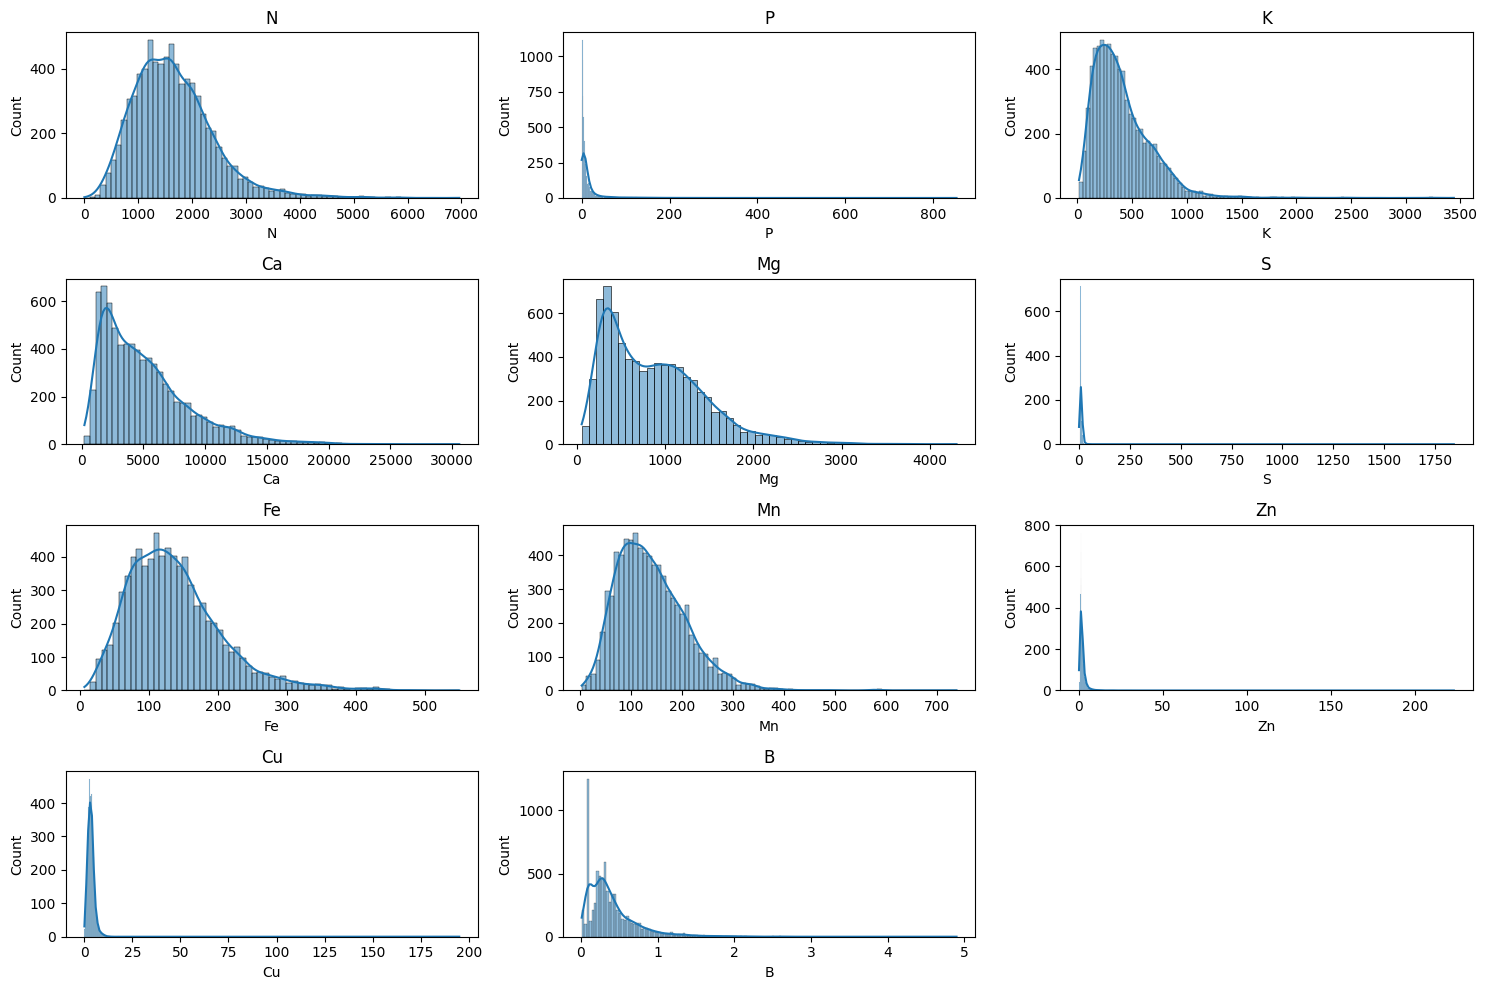

In [ ]:
target = train_df[['N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B']]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(target.columns):
    sns.histplot(target[col], ax=axes[i], kde=True)
    axes[i].set_title(col)

# Turning off the unused subplot if there are fewer than total subplots
for j in range(len(target.columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Feature Selection & Preprocessing**
- Standardizing data.
- Handling missing values and categorical variables.
- Choosing relevant features for the model.
- Feature creation
- Demensionality reduction

##### Handling train df and test df

In [ ]:
relevant_features_train = [
    "PID", "site", "pH",
    "BulkDensity",
    "cec20", "ecec20", "hp20", "ph20",
    "snd20", "soc20", "xhp20",
    "bio1", "bio12", "bio15", "bio7",
    "lstd", "lstn",
    "mdem", "slope", "tim", "ls", "dows",
    "mb1", "mb2", "mb3", "mb7",
    "bp", "wp", 'N', 'P', 'K', 'Ca', 'Mg',
    'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B']

train_df = train_df[relevant_features_train]

In [ ]:
relevant_features_test = [
    "PID", "site", "pH",
    "BulkDensity",
    "cec20", "ecec20", "hp20", "ph20",
    "snd20", "soc20", "xhp20",
    "bio1", "bio12", "bio15", "bio7",
    "lstd", "lstn",
    "mdem", "slope", "tim", "ls", "dows",
    "mb1", "mb2", "mb3", "mb7",
    "bp", "wp"]

test_df = test_df[relevant_features_test]

In [ ]:
train_df.shape

(7744, 39)

##### Handling sentinel 1 dataset

In [ ]:
# # Converting 'date' column to datetime and extract 'month'
# sentinel1['date'] = pd.to_datetime(sentinel1['date'])
# sentinel1['month'] = sentinel1['date'].dt.month

In [ ]:
# def get_season_by_lat_month(lat, month):
#     if -5 <= lat <= 5:
#         if month in [3, 4, 5]:
#             return 'long_rain'
#         elif month in [10, 11, 12]:
#             return 'short_rain'
#         else:
#             return 'dry'
#     elif lat > 5:
#         if month in [6, 7, 8, 9]:
#             return 'rainy'
#         else:
#             return 'dry'
#     elif lat < -5:
#         if month in [11, 12, 1, 2, 3]:
#             return 'rainy'
#         else:
#             return 'dry'
#     else:
#         return 'unknown'

# # Apply function to each row
# sentinel1['season'] = sentinel1.apply(lambda row: get_season_by_lat_month(row['lat'], row['month']), axis=1)

In [ ]:
# # Aggregating per PID
# agg_sent1 = sentinel1.groupby('PID').agg({'VH': ['mean', 'std'],
#                                           'VV': ['mean', 'std'],
#                                           'month': 'median'
#     }).reset_index()

# # Flattening column names
# agg_sent1.columns = ['PID', 'VH_mean', 'VH_std', 'VV_mean', 'VV_std', 'month_median']

# # # One-hot encode 'season'
# # season_mode = sentinel1.groupby('PID')['season'].agg(lambda x: x.mode()[0])  # Most frequent season per PID
# # season_encoded = pd.get_dummies(season_mode).reset_index()
# # season_encoded.columns = ['PID'] + [f'season_{col}' for col in season_encoded.columns[1:]]

# # # Merge encoded seasons with aggregated satellite features
# # agg_sent1 = agg_sent1.merge(season_encoded, on='PID', how='left')


##### Handling sentinel 2 dataset

In [ ]:
# Converting 'date' column to datetime
sentinel2['date'] = pd.to_datetime(sentinel2['date'], errors='coerce')

In [ ]:
# # Deriving vegetation indices from sentinel 2 dataset
# sentinel2['NDVI'] = (sentinel2['B8'] - sentinel2['B4']) / (sentinel2['B8'] + sentinel2['B4'])
# sentinel2['NDWI'] = (sentinel2['B3'] - sentinel2['B11']) / (sentinel2['B3'] + sentinel2['B11'])
# sentinel2['RENDVI'] = (sentinel2['B7'] - sentinel2['B5']) / (sentinel2['B7'] + sentinel2['B5'])

In [ ]:
# Selecting  columns to keep
columns_to_keep = ['PID', "B2", "B3", "B4", "B5", "B6",
                   "B7", "B8", "B8A", "B11", "B12"]
sent2_filtered = sentinel2[columns_to_keep]

In [ ]:
# Aggregating per PID
agg_sent2 = sent2_filtered.groupby('PID').agg(['mean', 'std']).reset_index()

# Flattening column names
agg_sent2.columns = ['PID'] + [f'{col[0]}_{col[1]}' for col in agg_sent2.columns[1:]]

agg_sent2.head()


,PID,B2_mean,B2_std,B3_mean,B3_std,B4_mean,B4_std,B5_mean,B5_std,B6_mean,...,B7_mean,B7_std,B8_mean,B8_std,B8A_mean,B8A_std,B11_mean,B11_std,B12_mean,B12_std
0,ID_002W8m,367.00,1.414214,541.5,33.234019,682.00,48.083261,967.5,112.429978,1344.00,...,1533.50,102.530483,1531.5,98.287843,1705.50,78.488853,2195.5,82.731493,1669.50,86.974134
1,ID_00Mug5,436.25,24.377243,648.5,35.902646,778.25,63.850737,1053.0,126.775392,1445.75,...,1642.50,188.422398,1893.0,141.072086,1814.00,255.933585,1487.5,113.485682,985.75,116.462798
2,ID_03sGRz,324.25,44.634628,561.5,48.500859,619.50,97.151085,1141.0,72.240340,1734.75,...,2007.25,77.512902,1957.0,87.246776,2278.75,72.587304,2119.5,169.222733,1351.00,159.417690
3,ID_046OrE,464.00,19.798990,797.5,24.748737,1147.00,18.384776,1398.0,0.000000,1735.00,...,1934.00,0.000000,2046.0,19.798990,2153.00,0.000000,2325.0,0.000000,1672.00,0.000000
4,ID_04AslO,154.50,40.509258,323.5,54.488531,257.50,58.495014,662.5,28.290163,1669.50,...,2052.50,181.865335,2112.5,241.811910,2253.50,217.661051,1339.0,41.569219,725.50,13.279056


In [ ]:
# Merging to train and test  with additional eart data
# train_df = train_df.merge(agg_sent1, on="PID", how="left")
train_df = train_df.merge(agg_sent2, on="PID", how="left")

# test_df = test_df.merge(agg_sent1, on="PID", how="left")
test_df = test_df.merge(agg_sent2, on="PID", how="left")
test_gap_df = pd.merge(test_gap_df, test_df[['PID', 'BulkDensity']], on='PID', how='left')

In [ ]:
# # Saving datasets to csv
# train_df.to_csv('train_df.csv', index=False)
# test_df.to_csv('test_df.csv', index=False)
# test_gap_df.to_csv('test_gap_df.csv', index=False)
# train_gap_df.to_csv('train_gap_df.csv', index=False)


In [ ]:
train_df.shape

(7744, 59)

##### Handling modis 13 and 16 dataset

In [ ]:
cols_to_keep_mod13 = ['PID','EVI', 'NDVI']
mod13 = mod13[cols_to_keep_mod13]

In [ ]:
cols_to_keep_mod16 = ['PID','ET', 'PET']
mod16 = mod16[cols_to_keep_mod16]

In [ ]:
# aggregating by mean for each PID
mod13_agg = mod13.groupby("PID").mean(numeric_only=True).reset_index()
mod16_agg = mod16.groupby("PID").mean(numeric_only=True).reset_index()

In [ ]:
# Merging to train and test  with modis data
train_df = train_df.merge(mod13_agg, on="PID", how="left")
train_df = train_df.merge(mod16_agg, on="PID", how="left")

test_df = test_df.merge(mod13_agg, on="PID", how="left")
test_df = test_df.merge(mod16_agg, on="PID", how="left")
test_gap_df = pd.merge(test_gap_df, test_df[['PID', 'BulkDensity']], on='PID', how='left')

In [ ]:
train_df.shape

(7744, 63)

##### Data Cleaning

In [33]:
# dataframe with null values
null_cols = train_df[train_df.isna().columns]
null_cols.dtypes.value_counts()

,count
float64,52
int64,9
object,2


In [34]:
# Filling missing values with the median for columns with missing values in train_df
for column in train_df.columns:
  if train_df[column].isnull().any():
    train_df[column].fillna(train_df[column].median(), inplace=True)

# Filling missing values with the median for columns with missing values in test_df
for column in test_df.columns:
  if test_df[column].isnull().any():
    test_df[column].fillna(test_df[column].median(), inplace=True)


In [35]:
# Checking for missing values
print(train_df.isna().sum().sum())
print(test_df.isna().sum().sum())

0
0


In [36]:
# Checking the shape of the train and test data
print(f"train_df shape {train_df.shape}")
print(f"test_df shape {test_df.shape}")
print(f"train_gap_df shape {train_gap_df.shape}")
print(f"test_gap_df shape {test_gap_df.shape}")

train_df shape (7744, 63)
test_df shape (2418, 52)
train_gap_df shape (85184, 5)
test_gap_df shape (26598, 5)


##### Feature engineering

In [37]:
target_columns = ['N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B']
cols_to_drop = ['N', 'P', 'K', 'Ca', 'Mg', 'S', 'Fe', 'Mn', 'Zn', 'Cu', 'B','PID','site']

# Defining the independent and dependent variables
X = train_df.drop(columns=cols_to_drop)
y = train_df[target_columns]
X_test = test_df.drop(columns=['PID',"site"])

In [12]:
# # Checking the shapes
# print(f"X shape {X.shape}")
# print(f"y shape {y.shape}")
# print(f"X_test shape {X_test.shape}")

##### Data Scaling

In [38]:
# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_test = scaler.transform(X_test)

##### Dimensionality reduction

In [ ]:
# # Choosing n components
# pca = PCA()
# pca.fit(X)

# cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# # Line plot
# plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')

# # 95% threshold
# plt.axhline(y=0.95, color='r', linestyle="--")

# plt.xlabel("Number of Components")
# plt.ylabel("Cumulative Explained Variance")
# plt.title("PCA - Choosing n_components")
# plt.grid(True)
# plt.show()


In [ ]:
# # Reducing input features

# # Initializing PCA
# pca = PCA(n_components=20)

# # Fitting pca to the train data
# X = pca.fit_transform(X)

# # Transforming test data
# X_test = pca.transform(X_test)

#### Splitting data into training and validation data

In [39]:
# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

## **Model Training**

### Random forest

In [45]:
# Instantiate the MultiOutputRegressor with RandomForest
rf = MultiOutputRegressor(RandomForestRegressor(
    n_estimators=100,
    max_depth=8,                    # Reduce depth even more
    min_samples_split=20,           # More conservative splits
    min_samples_leaf=10,            # Bigger leaves for regularization
    max_features='sqrt',
    bootstrap=True,
    random_state=42
))

# Fit the model
rf.fit(X_train, y_train)

# Predict on train and validation sets
rf_preds = rf.predict(X_train)
rf_val_preds = rf.predict(X_val)

# Evaluate metrics
mae_train = mean_absolute_error(y_train, rf_preds)
rmse_train = np.sqrt(mean_squared_error(y_train, rf_preds))
r2_train = r2_score(y_train, rf_preds)

mae_val = mean_absolute_error(y_val, rf_val_preds)
rmse_val = np.sqrt(mean_squared_error(y_val, rf_val_preds))
r2_val = r2_score(y_val, rf_val_preds)

# Print results
print(f" Training Metrics:")
print(f"  MAE:  {mae_train:.4f}")
print(f"  RMSE: {rmse_train:.4f}")
print(f"  R²:   {r2_train:.4f}")

print(f"\n Validation Metrics:")
print(f"  MAE:  {mae_val:.4f}")
print(f"  RMSE: {rmse_val:.4f}")
print(f"  R²:   {r2_val:.4f}")

 Training Metrics:
  MAE:  181.1636
  RMSE: 555.8200
  R²:   0.4613

 Validation Metrics:
  MAE:  201.2723
  RMSE: 592.4950
  R²:   0.3419


In [43]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 15.5 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 5, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
    }

    model = MultiOutputRegressor(RandomForestRegressor(**params, random_state=42, n_jobs=-1))
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    return rmse

# Run the optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Output best result
print("Best RMSE:", study.best_trial.value)
print("Best hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"{key}: {value}")

In [ ]:
# # Cross-validation using 5 folds
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_mse_scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
# cv_r2_scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=kf)

# # Converting the negative MSE to positive for interpretation
# cv_mse_scores = -cv_mse_scores

# # Printing cross-validation results
# print(f"Cross-validation Mean Squared Error : {cv_mse_scores.mean():.4f}")
# print(f"Cross-validation R-squared : {cv_r2_scores.mean() * 100:.4f}%")

In [ ]:
# # Hyperparameter tuning using optuna
# import optuna
# # Defining the Optuna objective function
# def objective_rf(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 300),
#         'max_depth': trial.suggest_int('max_depth', 3, 30),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
#         # 'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
#         'bootstrap': trial.suggest_categorical('bootstrap', [True, False])
#     }

#     base_rf = RandomForestRegressor(random_state=42, **params)
#     model = MultiOutputRegressor(base_rf)

#     model.fit(X_train, y_train)
#     preds = model.predict(X_val)

#     rmse = np.sqrt(mean_squared_error(y_val, preds))
#     return rmse  # Minimize RMSE

# # Running Optuna study
# study_rf = optuna.create_study(direction='minimize')
# study_rf.optimize(objective_rf, n_trials=50)

# # Printing best results
# print("Best Random Forest RMSE:", study_rf.best_trial.value)
# print("Best Random Forest Params:", study_rf.best_trial.params)

### Output
# Best Random Forest RMSE: 469.9359959150298
# Best Random Forest Params: {'n_estimators': 277, 'max_depth': 28, 'min_samples_split': 6, 'min_samples_leaf': 3, 'bootstrap': True}

### lgbm

In [46]:
lgb_params = {'n_estimators': 299, 'max_depth': 10, 'learning_rate': 0.04637758286284589,
'num_leaves': 43, 'min_child_samples': 29, 'subsample': 0.8416318852822458,
'colsample_bytree': 0.6267980921531952, 'reg_alpha': 4.016384486513543,
'reg_lambda': 0.33938656916373255}

# Instantiating MultiOutputRegressor regression
lgb = MultiOutputRegressor(LGBMRegressor(force_col_wise=True,silent=True, random_state=42, **lgb_params))

# Fitting the model to the training data
lgb.fit(X_train, y_train)

# Making prediction on the train and test using the model
lgb_preds= lgb.predict(X_train)
lgb_val_preds = lgb.predict(X_val)

# Calculating mean absolute error on the train and test set
mae_train = mean_absolute_error(y_train,lgb_preds)
mae_val = mean_absolute_error(y_val,lgb_val_preds)

# Calculating the rmse score on train and test set
rmse_train = np.sqrt(mean_squared_error(y_train,lgb_preds))
rmse_val = np.sqrt(mean_squared_error(y_val,lgb_val_preds))

# Printing the results
print(f"Training Mean Absolute Error (MAE): {mae_train}")
print(f"Training RMSE: {rmse_train}")
print(f"Validation Mean Absolute Error (MAE): {mae_val}")
print(f"Validation RMSE: {rmse_val}")

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Total Bins 11701
[LightGBM] [Info] Number of data points in the train set: 6195, number of used features: 50
[LightGBM] [Info] Start training from score 1659.143341
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

In [ ]:
# # Cross-validation using 5 folds
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_mse_scores = cross_val_score(lgb, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
# cv_r2_scores = cross_val_score(lgb, X_train, y_train, scoring='r2', cv=kf)

# # Converting the negative MSE to positive for interpretation
# cv_mse_scores = -cv_mse_scores

# # Printing cross-validation results
# print(f"Cross-validation Mean Squared Error : {cv_mse_scores.mean():.4f}")
# print(f"Cross-validation R-squared : {cv_r2_scores.mean() * 100:.4f}%")

In [ ]:
# # Hyperparameter tuning using optuna
# def objective_lgbm(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 300),
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'num_leaves': trial.suggest_int('num_leaves', 20, 300),
#         'min_child_samples': trial.suggest_int('min_child_samples', 5, 30),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
#     }

#     model = MultiOutputRegressor(LGBMRegressor(random_state=42, **params))
#     model.fit(X_train, y_train)

#     preds = model.predict(X_val)
#     rmse = np.sqrt(mean_squared_error(y_val, preds))
#     return rmse

# study_lgbm = optuna.create_study(direction='minimize')
# study_lgbm.optimize(objective_lgbm, n_trials=50)

# print("Best LGBM RMSE:", study_lgbm.best_trial.value)

# print("Best LGBM Params:", study_lgbm.best_trial.params)

# # Best LGBM RMSE: 454.66477888605647
# # Best LGBM Params: {'n_estimators': 299, 'max_depth': 10, 'learning_rate': 0.04637758286284589, 'num_leaves': 43,
# #                    'min_child_samples': 29, 'subsample': 0.8416318852822458,
# #                    'colsample_bytree': 0.6267980921531952, 'reg_alpha': 4.016384486513543,
# #                      'reg_lambda': 0.33938656916373255}

### Catboost

In [ ]:
cat_params =  {'iterations': 272, 'depth': 10, 'learning_rate': 0.09248513932895125,
               'l2_leaf_reg': 5.47436641757423,'bagging_temperature': 0.061787571388177365,
               'random_strength': 0.43512477783874626
    }

# Instantiating MultiOutputRegressor regression
cat = MultiOutputRegressor(CatBoostRegressor(random_state=42, silent=True, **cat_params))

# Fitting the model to the training data
cat.fit(X_train, y_train)

# Making prediction on the train and test using the model
cat_preds= cat.predict(X_train)
cat_val_preds = cat.predict(X_val)

# Calculating mean absolute error on the train and test set
mae_train = mean_absolute_error(y_train,cat_preds)
mae_val = mean_absolute_error(y_val,cat_val_preds)

# Calculating the rmse score on train and test set
rmse_train = np.sqrt(mean_squared_error(y_train,cat_preds))
rmse_val = np.sqrt(mean_squared_error(y_val,cat_val_preds))

# Printing the results
print(f"Training Mean Absolute Error (MAE): {mae_train}")
print(f"Training RMSE: {rmse_train}")
print(f"Validation Mean Absolute Error (MAE): {mae_val}")
print(f"Validation RMSE: {rmse_val}")

Learning rate set to 0.054616
0:	learn: 731.6654896	total: 165ms	remaining: 2m 44s
1:	learn: 718.2252281	total: 183ms	remaining: 1m 31s
2:	learn: 705.2851771	total: 195ms	remaining: 1m 4s
3:	learn: 694.1086875	total: 206ms	remaining: 51.3s
4:	learn: 682.8823993	total: 215ms	remaining: 42.8s
5:	learn: 672.9675512	total: 224ms	remaining: 37.2s
6:	learn: 662.9406710	total: 233ms	remaining: 33s
7:	learn: 653.8542294	total: 241ms	remaining: 29.9s
8:	learn: 645.2145967	total: 250ms	remaining: 27.5s
9:	learn: 637.1688065	total: 259ms	remaining: 25.6s
10:	learn: 629.8168230	total: 267ms	remaining: 24s
11:	learn: 623.8318366	total: 276ms	remaining: 22.7s
12:	learn: 617.0734736	total: 285ms	remaining: 21.6s
13:	learn: 610.4531931	total: 293ms	remaining: 20.6s
14:	learn: 605.5292591	total: 302ms	remaining: 19.9s
15:	learn: 599.7903403	total: 311ms	remaining: 19.1s
16:	learn: 593.9100834	total: 321ms	remaining: 18.5s
17:	learn: 589.4448896	total: 330ms	remaining: 18s
18:	learn: 584.8635569	total: 

In [ ]:
# # Cross-validation using 5 folds
# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# cv_mse_scores = cross_val_score(cat, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
# cv_r2_scores = cross_val_score(cat, X_train, y_train, scoring='r2', cv=kf)

# # Converting the negative MSE to positive for interpretation
# cv_mse_scores = -cv_mse_scores

# # Printing cross-validation results
# print(f"Cross-validation Mean Squared Error : {cv_mse_scores.mean():.4f}")
# print(f"Cross-validation R-squared : {cv_r2_scores.mean() * 100:.4f}%")

In [ ]:
# # Hyperparameter tuning using optuna
# def objective_catboost(trial):
#     params = {
#         'iterations': trial.suggest_int('iterations', 50, 300),
#         'depth': trial.suggest_int('depth', 4, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
#         'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
#         'random_strength': trial.suggest_float('random_strength', 0.0, 1.0)
#     }

#     # Instatianting the model
#     model = MultiOutputRegressor(CatBoostRegressor(
#         random_state=42, silent=True, verbose=0, **params
#     ))

#     model.fit(X_train, y_train)

#     preds = model.predict(X_val)
#     rmse = np.sqrt(mean_squared_error(y_val, preds))
#     return rmse

# study_catboost = optuna.create_study(direction='minimize')
# study_catboost.optimize(objective_catboost, n_trials=50)

# print("Best CatBoost RMSE:", study_catboost.best_trial.value)
# print("Best CatBoost Params:", study_catboost.best_trial.params)

# # Best CatBoost RMSE: 464.27979467771473
# # Best CatBoost Params: {'iterations': 272, 'depth': 10, 'learning_rate': 0.09248513932895125,
# #                         'l2_leaf_reg': 5.47436641757423, 'bagging_temperature': 0.061787571388177365,
# #                         'random_strength': 0.43512477783874626}


[I 2025-05-13 10:24:59,879] A new study created in memory with name: no-name-a49d12d0-c656-42d0-9e17-f5ee5f5ee713
[I 2025-05-13 10:25:14,144] Trial 0 finished with value: 490.4341121255202 and parameters: {'iterations': 205, 'depth': 4, 'learning_rate': 0.1002610667807252, 'l2_leaf_reg': 1.8993146778049816, 'bagging_temperature': 0.37715214591289037, 'random_strength': 0.4848942267601175}. Best is trial 0 with value: 490.4341121255202.
[I 2025-05-13 10:27:46,547] Trial 1 finished with value: 484.54425275117995 and parameters: {'iterations': 87, 'depth': 10, 'learning_rate': 0.05947240620205376, 'l2_leaf_reg': 9.62284981845227, 'bagging_temperature': 0.8288543507674926, 'random_strength': 0.552452380447908}. Best is trial 1 with value: 484.54425275117995.
[I 2025-05-13 10:28:07,243] Trial 2 finished with value: 486.61697434601336 and parameters: {'iterations': 233, 'depth': 5, 'learning_rate': 0.2530719335488886, 'l2_leaf_reg': 9.372976114803935, 'bagging_temperature': 0.011546538585162

Best CatBoost RMSE: 464.27979467771473
Best CatBoost Params: {'iterations': 272, 'depth': 10, 'learning_rate': 0.09248513932895125, 'l2_leaf_reg': 5.47436641757423, 'bagging_temperature': 0.061787571388177365, 'random_strength': 0.43512477783874626}


### xgboost

In [47]:
# Instantiating MultiOutputRegressor regression
xgb = MultiOutputRegressor(XGBRegressor(random_state=42))

# Fitting the model to the training data
xgb.fit(X_train, y_train)

# Making prediction on the train and test using the model
xgb_preds= xgb.predict(X_train)
xgb_val_preds = xgb.predict(X_val)

# Calculating mean absolute error on the train and test set
mae_train = mean_absolute_error(y_train,xgb_preds)
mae_val = mean_absolute_error(y_val,xgb_val_preds)

# Calculating the rmse score on train and test set
rmse_train = np.sqrt(mean_squared_error(y_train,xgb_preds))
rmse_val = np.sqrt(mean_squared_error(y_val,xgb_val_preds))

# Printing the results
print(f"Training Mean Absolute Error (MAE): {mae_train}")
print(f"Training RMSE: {rmse_train}")
print(f"Validation Mean Absolute Error (MAE): {mae_val}")
print(f"Validation RMSE: {rmse_val}")

Training Mean Absolute Error (MAE): 52.74665451049805
Training RMSE: 144.50485907703936
Validation Mean Absolute Error (MAE): 174.0451202392578
Validation RMSE: 532.1580181205579


In [ ]:
# # Defining scorers
# scoring = {
#     'mae': make_scorer(mean_absolute_error),
#     'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
#     'r2': make_scorer(r2_score)
# }

# # Initializing K-Fold
# kf = KFold(n_splits=5, shuffle=True, random_state=42)

# # Performing cross-validation
# cv_results = cross_validate(xgb, X_train, y_train, scoring=scoring, cv=kf)

# # Printing mean scores
# print(f"Cross-validation MAE: {cv_results['test_mae'].mean():.4f}")
# print(f"Cross-validation RMSE: {cv_results['test_rmse'].mean():.4f}")
# print(f"Cross-validation R²: {cv_results['test_r2'].mean() * 100:.2f}%")

In [ ]:
## Hyperparameter tuning
# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 300),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
#         'subsample': trial.suggest_float('subsample', 0.5, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
#         'gamma': trial.suggest_float('gamma', 0, 5),
#         'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
#         'reg_lambda': trial.suggest_float('reg_lambda', 0, 5)
#     }

#     xgb = XGBRegressor(random_state=42, **params)
#     model = MultiOutputRegressor(xgb)
#     model.fit(X_train, y_train)

#     preds = model.predict(X_val)
#     rmse = np.sqrt(mean_squared_error(y_val, preds))
#     return rmse

# # Run Optuna study
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

# # Print best result
# print("Best trial:")
# print(f"  RMSE: {study.best_trial.value}")
# print("  Params: {study.best_trial.params}")

[I 2025-05-13 12:18:28,416] A new study created in memory with name: no-name-4472c084-b337-44ac-96b4-abed77794a81
[I 2025-05-13 12:18:32,706] Trial 0 finished with value: 510.3538600814145 and parameters: {'n_estimators': 175, 'max_depth': 3, 'learning_rate': 0.15764822348237226, 'subsample': 0.829103877456966, 'colsample_bytree': 0.6019390441224215, 'gamma': 0.563168132723012, 'reg_alpha': 2.290765008012017, 'reg_lambda': 4.875659150836331}. Best is trial 0 with value: 510.3538600814145.
[I 2025-05-13 12:19:02,189] Trial 1 finished with value: 520.1104450018285 and parameters: {'n_estimators': 283, 'max_depth': 7, 'learning_rate': 0.2202704064251935, 'subsample': 0.9528784114323902, 'colsample_bytree': 0.8624353497430203, 'gamma': 0.6322302055932055, 'reg_alpha': 0.8877578932989394, 'reg_lambda': 3.452391251063252}. Best is trial 0 with value: 510.3538600814145.
[I 2025-05-13 12:19:07,260] Trial 2 finished with value: 517.8660842824137 and parameters: {'n_estimators': 222, 'max_depth'

Best trial:
  RMSE: 488.5216058425666
  Params: {study.best_trial.params}


### Gradient boost regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiating MultiOutputRegressor regression
gb = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))

# Fitting the model to the training data
gb.fit(X_train, y_train)

# Making prediction on the train and test using the model
gb_preds= gb.predict(X_train)
gb_val_preds = gb.predict(X_val)

# Calculating mean absolute error on the train and test set
mae_train = mean_absolute_error(y_train,gb_preds)
mae_val = mean_absolute_error(y_val,gb_val_preds)

# Calculating the rmse score on train and test set
rmse_train = np.sqrt(mean_squared_error(y_train,gb_preds))
rmse_val = np.sqrt(mean_squared_error(y_val,gb_val_preds))

# Printing the results
print(f"Training Mean Absolute Error (MAE): {mae_train}")
print(f"Training RMSE: {rmse_train}")
print(f"Validation Mean Absolute Error (MAE): {mae_val}")
print(f"Validation RMSE: {rmse_val}")

Training Mean Absolute Error (MAE): 157.35947427258114
Training RMSE: 456.44587577818726
Validation Mean Absolute Error (MAE): 173.06239611691387
Validation RMSE: 509.2736686397375


### H20 ML

In [14]:
!pip install h2o

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 6.5 MB/s eta 0:00:00


In [20]:
import h2o
from h2o.automl import H2OAutoML

# Start H2O
h2o.init()

# Load data
data = h2o.import_file("/content/drive/MyDrive/soil fertility pred/train_df.csv")

# Define target columns (multi-target)
target_columns = ['N', 'P', 'K', 'pH', 'S', 'Ca', 'Mg', 'Fe', 'Mn', 'Cu', 'Zn']  # update to your actual columns

# Define features (exclude all targets)
feature_columns = [col for col in data.columns if col not in target_columns]

# Store models for each target
models = {}

# Train one model per target
for target in target_columns:
    print(f"\nTraining model for: {target}")
    aml = H2OAutoML(max_runtime_secs=600, project_name=f"aml_{target}", seed=1)
    aml.train(x=feature_columns, y=target, training_frame=data)

    # Save best model
    models[target] = aml.leader
    print(f"Best model ID for {target}: {aml.leader.model_id}")

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,5 mins 59 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,1 month and 18 days
H2O_cluster_name:,H2O_from_python_unknownUser_v5hsu8
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.163 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%

Training model for: N
AutoML progress: |
21:24:53.185: _train param, Dropping bad and constant columns: [PID]

███████
21:25:47.892: _train param, Dropping bad and constant columns: [PID]

█
21:25:56.868: _train param, Dropping bad and constant columns: [PID]

███
21:26:31.787: _train param, Dropping unused columns: [PID]
21:26:32.922: _train param, Dropping bad and constant columns: [PID]

█████
21:27:21.3: _train param, Dropping bad and constant columns: [PID]

████████
21:28:37.930: _train param, Dropping bad and constant columns: [PID]

██
21:28:58.23: _train param, Dropping bad and constant columns: [PID]

██
21:29:18.833: _train param, Dropping bad and constant columns: [PID]

███
21:29:42.189: _train param, Dropping unused columns: [PID]


21:29:42.715: _train param, Dropping unused columns: [PID]
21:29:43.636: _train param, Dropping bad and constant columns: [PID]

██
21:30:00.64: _t

H2OJobCancelled: Job<$03017f00000132d4ffffffff$_9786f70af7a3ac97cb1f245e2a034ffe> was cancelled by the user.

### Regressor chain

In [50]:
from sklearn.multioutput import RegressorChain

def evaluate_regressor_chain(X_train, X_val ,y_train, y_val, base_model, random_state=42):
    # Creating  regressor chain
    chain = RegressorChain(base_model, random_state=random_state)
    # Fitting data to the model
    chain.fit(X_train, y_train)

    # Predicting y on the validation data
    y_pred = chain.predict(X_val)

    # Evaluating the model
    mae = mean_absolute_error(y_val, y_pred)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    return {"model": chain,"MAE": mae,"RMSE": rmse}

In [51]:
# Using adaboost regressor on the regressor chain
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(random_state=42)

# Regressor chain using adaboost
evaluate_regressor_chain(X_train, X_val, y_train, y_val, ab)

{'model': RegressorChain(base_estimator=AdaBoostRegressor(random_state=42),
                random_state=42),
 'MAE': 347.4554584168208,
 'RMSE': np.float64(858.1771810767707)}

### Autogluon

In [ ]:
!pip install autogluon

In [ ]:
import pandas as pd
from autogluon.tabular import TabularPredictor

# ✅ Load training data
train_df = pd.read_csv("/content/drive/MyDrive/soil fertility pred/train_df.csv")

# ✅ Load test data
test_df = pd.read_csv("/content/drive/MyDrive/soil fertility pred/test_df.csv")

# ✅ Define target columns (soil nutrients)
target_columns = ['N', 'P', 'K', 'pH', 'S', 'Ca', 'Mg', 'Fe', 'Mn', 'Cu', 'Zn']

# ✅ Define features (exclude target columns)
feature_columns = [col for col in train_df.columns if col not in target_columns]

# ✅ Remove target columns from test set if they exist
X_test = test_df.drop(columns=[col for col in target_columns if col in test_df.columns])

# ✅ Dictionary to store models and predictions
predictors = {}
predictions_dict = {}

# ✅ Train one model per target
for target in target_columns:
    print(f"\n🔧 Training model for target: {target}")
    predictor = TabularPredictor(label=target, problem_type='regression').fit(train_df)
    predictors[target] = predictor

    # ✅ Predict on test data
    print(f"📈 Predicting {target} on test data")
    predictions_dict[target] = predictor.predict(X_test)

# ✅ Combine all target predictions into a single DataFrame
predictions_df = pd.DataFrame(predictions_dict)

### NEURAL NET    

In [52]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Add
from tensorflow.keras.models import Model

# Input layer
input_layer = Input(shape=(X_train.shape[1],))

# First dense block
x = Dense(128, activation='relu')(input_layer)
x = Dense(128, activation='relu')(x)

# Skip connection: add input to output of second layer (after mapping to same dimension)
shortcut = Dense(128)(input_layer)
x = Add()([x, shortcut])
x = tf.keras.layers.ReLU()(x)  # Apply activation after addition

# Second dense block with another skip connection
x2 = Dense(64, activation='relu')(x)
x2 = Dense(64, activation='relu')(x2)

# Add residual
shortcut2 = Dense(64)(x)
x = Add()([x2, shortcut2])
x = tf.keras.layers.ReLU()(x)

# Output layer (multi-target regression)
output_layer = Dense(11)(x)

# Create and compile model
resnet_model = Model(inputs=input_layer, outputs=output_layer)
resnet_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history = resnet_model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=32, verbose=1)

# Predict and evaluate
nn_pred = resnet_model.predict(X_val)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_val, nn_pred)
rmse = np.sqrt(mean_squared_error(y_val, nn_pred))
r2 = r2_score(y_val, nn_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 3107720.2500 - mae: 647.5531 - val_loss: 865574.1250 - val_mae: 325.0227
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 756318.2500 - mae: 316.1011 - val_loss: 644837.3750 - val_mae: 291.4222
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 546092.1250 - mae: 275.5935 - val_loss: 531504.5000 - val_mae: 259.2508
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 440648.3750 - mae: 246.9074 - val_loss: 517869.0000 - val_mae: 251.2462
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 434453.9688 - mae: 240.4351 - val_loss: 500921.8438 - val_mae: 243.0796
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 392704.0938 - mae: 228.6386 - val_loss: 461669.2500 - val_mae: 236.3902
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 367054.5938 - mae: 221.0976 - val_loss: 465318.5625 - val_mae: 234.5683
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 375587.1562 - m

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the model
nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(11)
])

# Compile
nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = nn.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=32, verbose=1)

# Predict on validation set
nn_pred = nn.predict(X_val)

# Evaluation metrics
mae = mean_absolute_error(y_val, nn_pred)
rmse = np.sqrt(mean_squared_error(y_val, nn_pred))
r2 = r2_score(y_val, nn_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Epoch 1/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3810857.2500 - mae: 738.6845 - val_loss: 3201372.5000 - val_mae: 601.1871
Epoch 2/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2562528.2500 - mae: 533.1821 - val_loss: 1356319.1250 - val_mae: 397.3215
Epoch 3/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1298587.3750 - mae: 388.7338 - val_loss: 1020878.4375 - val_mae: 347.8740
Epoch 4/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 941969.1875 - mae: 337.9784 - val_loss: 881800.2500 - val_mae: 326.3454
Epoch 5/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 866442.7500 - mae: 324.8777 - val_loss: 788935.0625 - val_mae: 306.9841
Epoch 6/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 724118.8750 - mae: 301.9612 - val_loss: 718805.3125 - val_mae: 291.6285
Epoch 7/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 664362.3750 - mae: 284.3216 - val_loss: 668792.6875 - val_mae: 280.1105
Epoch 8/50
175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 583153.750

In [49]:
import optuna
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def create_model(trial):
    # Suggest number of layers and units
    n_layers = trial.suggest_int("n_layers", 1, 3)
    model = Sequential()
    input_dim = X_train.shape[1]

    for i in range(n_layers):
        num_hidden = trial.suggest_int(f"n_units_l{i}", 32, 256)
        activation = trial.suggest_categorical("activation", ["relu", "tanh", "elu"])
        if i == 0:
            model.add(Dense(num_hidden, activation=activation, input_shape=(input_dim,)))
        else:
            model.add(Dense(num_hidden, activation=activation))

    # Output layer
    model.add(Dense(11))  # 11 target variables

    # Compile
    optimizer = trial.suggest_categorical("optimizer", ["adam", "rmsprop", "sgd"])
    model.compile(optimizer=optimizer, loss="mse", metrics=["mae"])

    return model

def objective(trial):
    tf.keras.backend.clear_session()

    model = create_model(trial)
    batch_size = trial.suggest_categorical("batch_size", [16, 32, 64])
    epochs = trial.suggest_int("epochs", 20, 100)

    # Train model
    history = model.fit(
        X_train, y_train,
        validation_split=0.1,
        epochs=epochs,
        batch_size=batch_size,
        verbose=0
    )

    # Evaluate
    preds = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    return rmse

# Run optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30)

# Output best hyperparameters
print("Best RMSE:", study.best_trial.value)
print("Best Hyperparameters:")
for key, value in study.best_trial.params.items():
    print(f"{key}: {value}")

[I 2025-05-15 22:13:12,613] A new study created in memory with name: no-name-3d65f0b5-524b-4ddf-b194-83a584a78a8b


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2025-05-15 22:14:47,448] Trial 0 finished with value: 504.6545229164205 and parameters: {'n_layers': 2, 'n_units_l0': 239, 'activation': 'relu', 'n_units_l1': 72, 'optimizer': 'rmsprop', 'batch_size': 16, 'epochs': 81}. Best is trial 0 with value: 504.6545229164205.


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-05-15 22:15:19,503] Trial 1 finished with value: 887.5216194549854 and parameters: {'n_layers': 3, 'n_units_l0': 191, 'activation': 'tanh', 'n_units_l1': 152, 'n_units_l2': 43, 'optimizer': 'sgd', 'batch_size': 32, 'epochs': 50}. Best is trial 0 with value: 504.6545229164205.


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[W 2025-05-15 22:15:59,025] Trial 2 failed with parameters: {'n_layers': 2, 'n_units_l0': 256, 'activation': 'relu', 'n_units_l1': 78, 'optimizer': 'sgd', 'batch_size': 16, 'epochs': 36} because of the following error: ValueError('Input contains NaN.').
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/optuna/study/_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "<ipython-input-49-e23399316c2f>", line 49, in objective
    rmse = np.sqrt(mean_squared_error(y_val, preds))
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py", line 565, in mean_squared_error
    _check_reg_targets_with_floating_dtype(
  File "/usr/local/lib/python3.11/dist-packag

ValueError: Input contains NaN.

## **Generating Predictions & Submission File**

In [ ]:
# Making prediction on the test data
test_predictions = lgb.predict(X_test)

In [ ]:
# Splitting the predictions into separate columns
N_pred =  test_predictions[:, 0]  # Predictions for N
P_pred =  test_predictions[:, 1]  # Predictions for P
K_pred =  test_predictions[:, 2]  # Predictions for K
Ca_pred = test_predictions[:, 3]  # Predictions for Ca
Mg_pred = test_predictions[:, 4]  # Predictions for Mg
S_pred =  test_predictions[:, 5]  # Predictions for S
Fe_pred = test_predictions[:, 6]  # Predictions for Fe
Mn_pred = test_predictions[:, 7]  # Predictions for Mn
Zn_pred = test_predictions[:, 8]  # Predictions for Zn
Cu_pred = test_predictions[:, 9]  # Predictions for Cu
B_pred =  test_predictions[:, 10]  # Predictions for B


In [ ]:
submission = pd.DataFrame({'PID': test_df['PID'], 'N': N_pred, 'P': P_pred, 'K': K_pred, 'Ca': Ca_pred, 'Mg': Mg_pred, 'S': S_pred, 'Fe': Fe_pred, 'Mn': Mn_pred, 'Zn': Zn_pred, 'Cu': Cu_pred, 'B': B_pred})
submission.head()

,PID,N,P,K,Ca,Mg,S,Fe,Mn,Zn,Cu,B
0,ID_NGS9Bx,1427.077990,2.794189,160.511782,5578.893185,1959.323372,8.871727,135.707468,122.013801,1.516773,4.166842,0.236493
1,ID_YdVKXw,1142.936781,5.851491,170.125449,6884.136678,2199.538013,8.329908,118.203127,108.763210,1.482358,3.826845,0.232479
2,ID_MZAlfE,1513.394067,0.194344,172.560398,4902.631920,1880.607472,7.107275,134.477629,144.281471,0.894364,4.497535,0.199121
3,ID_GwCCMN,1473.758702,-0.037988,160.724772,5947.474111,2173.493921,7.779251,140.107496,144.706223,1.375923,4.206244,0.236874
4,ID_K8sowf,1840.702763,1.620354,189.313723,4502.778169,1591.719114,7.298814,137.673942,122.529654,1.636457,5.161957,0.214173


In [ ]:
# Turning  submission into a 3 column file that has the column PID, Nutrient, Value
submission_melted = submission.melt(id_vars=['PID'], var_name='Nutrient', value_name='Available_Nutrients_in_ppm')
submission_melted = submission_melted.sort_values('PID')
submission_melted.head()

,PID,Nutrient,Available_Nutrients_in_ppm
19869,ID_002W8m,Zn,3.266235
15033,ID_002W8m,Fe,167.676487
2943,ID_002W8m,P,4.765375
24705,ID_002W8m,B,0.371955
525,ID_002W8m,N,1956.800368


## **Calculating the nutrient gaps**

- Transforming predicted ppm values to available nutrients (kg/ha) to determine the nutrient gaps.

- We are determining the nutrients needed for Maize crops to yeild 4 tons/ha at a depth of 20cm.

Available nutrients are calculated by

`Available (kg/ha) = ppm × soil depth (cm) × bulk density (g/cm³) × 0.1`

In [ ]:
# Merging test_gap_df with submission_melted on PID and Nutrient
nutrient_df = pd.merge(test_gap_df, submission_melted, on=['PID', 'Nutrient'], how='left')


In [ ]:
soil_depth = 20  # cm

# Calculatin the Available_Nutrients_in_kg_ha
nutrient_df['Available_Nutrients_in_kg_ha'] = (nutrient_df['Available_Nutrients_in_ppm']
                                               * soil_depth * nutrient_df['BulkDensity'] * 0.1)

In [ ]:
nutrient_df.head()

,Nutrient,Required,PID,BulkDensity,Available_Nutrients_in_ppm,Available_Nutrients_in_kg_ha
0,N,100.0,ID_NGS9Bx,1.2,1427.077990,3424.987177
1,P,40.0,ID_NGS9Bx,1.2,2.794189,6.706054
2,K,52.0,ID_NGS9Bx,1.2,160.511782,385.228276
3,Ca,12.0,ID_NGS9Bx,1.2,5578.893185,13389.343645
4,Mg,8.0,ID_NGS9Bx,1.2,1959.323372,4702.376092


In [ ]:
nutrient_df["Gap"] = nutrient_df["Required"] - nutrient_df["Available_Nutrients_in_kg_ha"]

In [ ]:
nutrient_df['ID'] = nutrient_df['PID'] + "_" + nutrient_df['Nutrient']
nutrient_df = nutrient_df[['ID', 'Gap']]
nutrient_df.head()

,ID,Gap
0,ID_NGS9Bx_N,-3324.987177
1,ID_NGS9Bx_P,33.293946
2,ID_NGS9Bx_K,-333.228276
3,ID_NGS9Bx_Ca,-13377.343645
4,ID_NGS9Bx_Mg,-4694.376092


If a value is negative it means there is excess of that nutrient in the soil already and the farmer does not need to add any more. If the value is positive then the farmer needs to add those nutrients to the soil.

In [ ]:
nutrient_df.to_csv('submission.csv', index=False)
print("Submission file saved as submission.csv")

Submission file saved as submission.csv
